In [25]:
words = open('names.txt', 'r').read().splitlines()

In [26]:
import torch

In [27]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [28]:
from collections import defaultdict
bigram_dict = defaultdict(int)
for word in words:
    chs = ['<s>'] + list(word) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        python_key = ch1 + ch2
        bigram_dict[python_key] += 1
sorted(bigram_dict.items(), key=lambda item:item[1], reverse=True)


[('n<e>', 6763),
 ('a<e>', 6640),
 ('an', 5438),
 ('<s>a', 4410),
 ('e<e>', 3983),
 ('ar', 3264),
 ('el', 3248),
 ('ri', 3033),
 ('na', 2977),
 ('<s>k', 2963),
 ('le', 2921),
 ('en', 2675),
 ('la', 2623),
 ('ma', 2590),
 ('<s>m', 2538),
 ('al', 2528),
 ('i<e>', 2489),
 ('li', 2480),
 ('ia', 2445),
 ('<s>j', 2422),
 ('on', 2411),
 ('h<e>', 2409),
 ('ra', 2356),
 ('ah', 2332),
 ('ha', 2244),
 ('ya', 2143),
 ('in', 2126),
 ('<s>s', 2055),
 ('ay', 2050),
 ('y<e>', 2007),
 ('er', 1958),
 ('nn', 1906),
 ('yn', 1826),
 ('ka', 1731),
 ('ni', 1725),
 ('re', 1697),
 ('<s>d', 1690),
 ('ie', 1653),
 ('ai', 1650),
 ('<s>r', 1639),
 ('am', 1634),
 ('ly', 1588),
 ('<s>l', 1572),
 ('<s>c', 1542),
 ('<s>e', 1531),
 ('ja', 1473),
 ('r<e>', 1377),
 ('ne', 1359),
 ('ll', 1345),
 ('il', 1345),
 ('is', 1316),
 ('l<e>', 1314),
 ('<s>t', 1308),
 ('<s>b', 1306),
 ('da', 1303),
 ('sh', 1285),
 ('de', 1283),
 ('ee', 1271),
 ('mi', 1256),
 ('sa', 1201),
 ('s<e>', 1169),
 ('<s>n', 1146),
 ('as', 1118),
 ('yl', 110

In [79]:
letters = sorted(list(set(''.join(words))))
stoi = {letter: index for index, letter in enumerate(letters, 1)}
stoi['.'] = 0
itos = {value: index for index, value in stoi.items()}

bigram_counts = torch.zeros(27,27, dtype=torch.int32)
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram_counts[stoi[ch1], stoi[ch2]] += 1

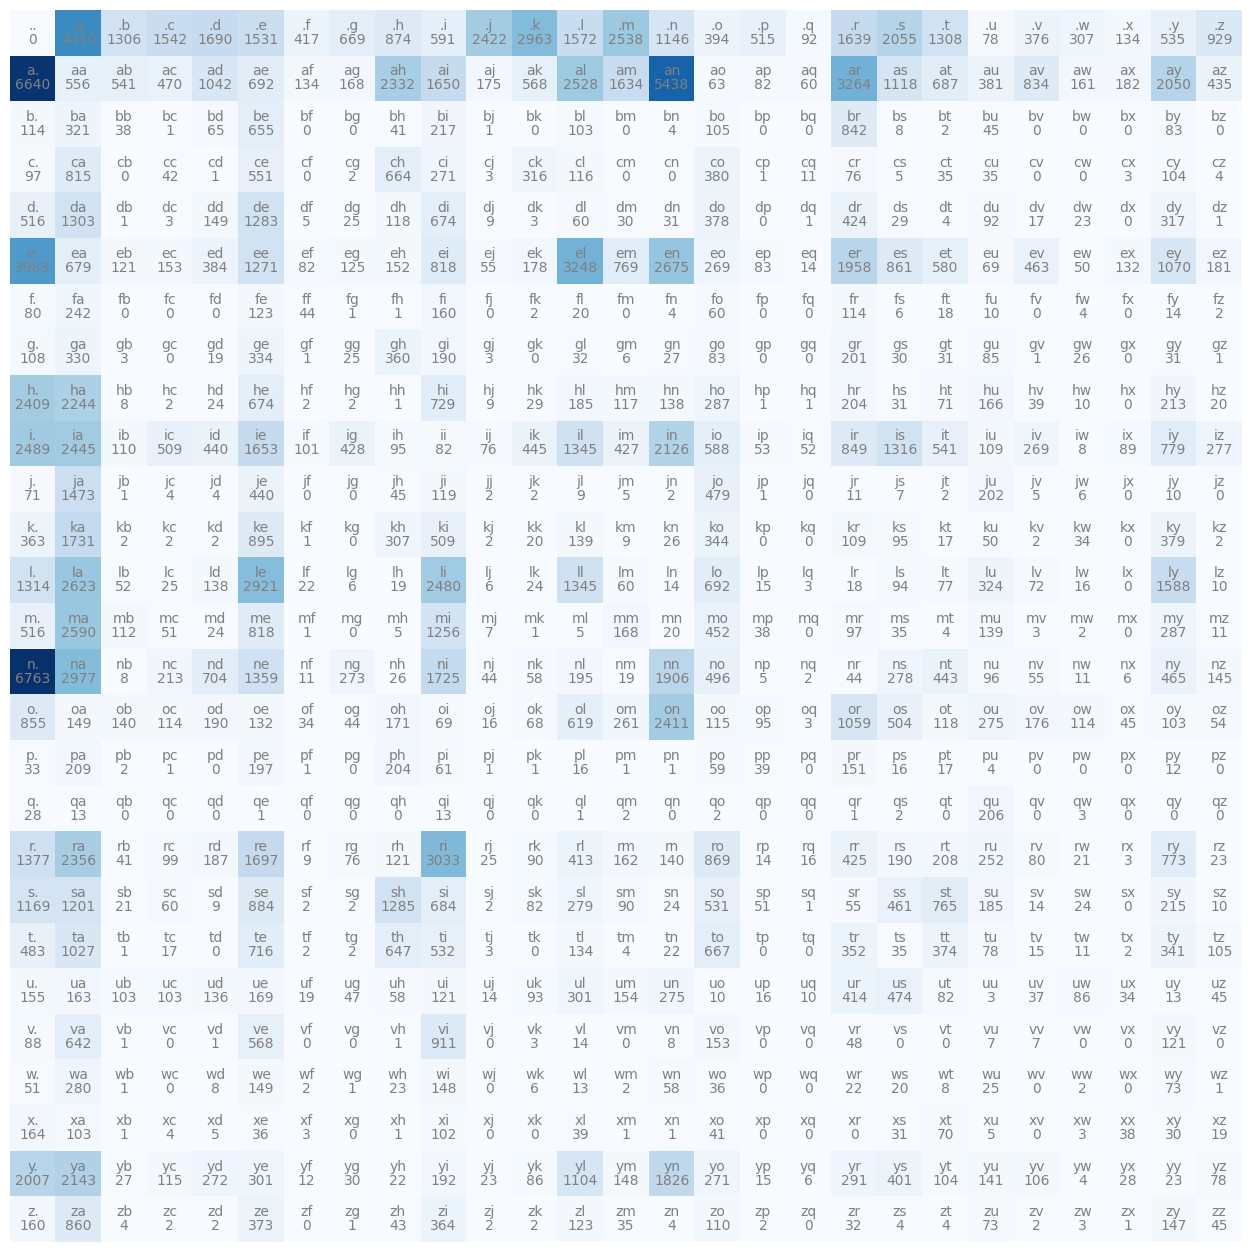

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_counts, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, bigram_counts[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');



In [94]:
GENERATOR_VALUE = torch.Generator().manual_seed(2147483647)

In [101]:
first_row = bigram_counts[0].float()
first_row = first_row / first_row.sum()

hello = torch.multinomial(first_row, num_samples=100, replacement=True, generator=GENERATOR_VALUE)
words = []
current_word = []
index = 0
for i in range(50):
    while True:
        probability_distribution = bigram_counts[index].float()
        probability_distribution = probability_distribution / probability_distribution.sum()
        chosen_index =  torch.multinomial(probability_distribution, num_samples=1, replacement=True, generator=GENERATOR_VALUE)
        chosen_index = chosen_index[0].item()
        current_word.append(itos[chosen_index])
        index = chosen_index
        if index == 0:
            words.append(current
            break
for i in wo

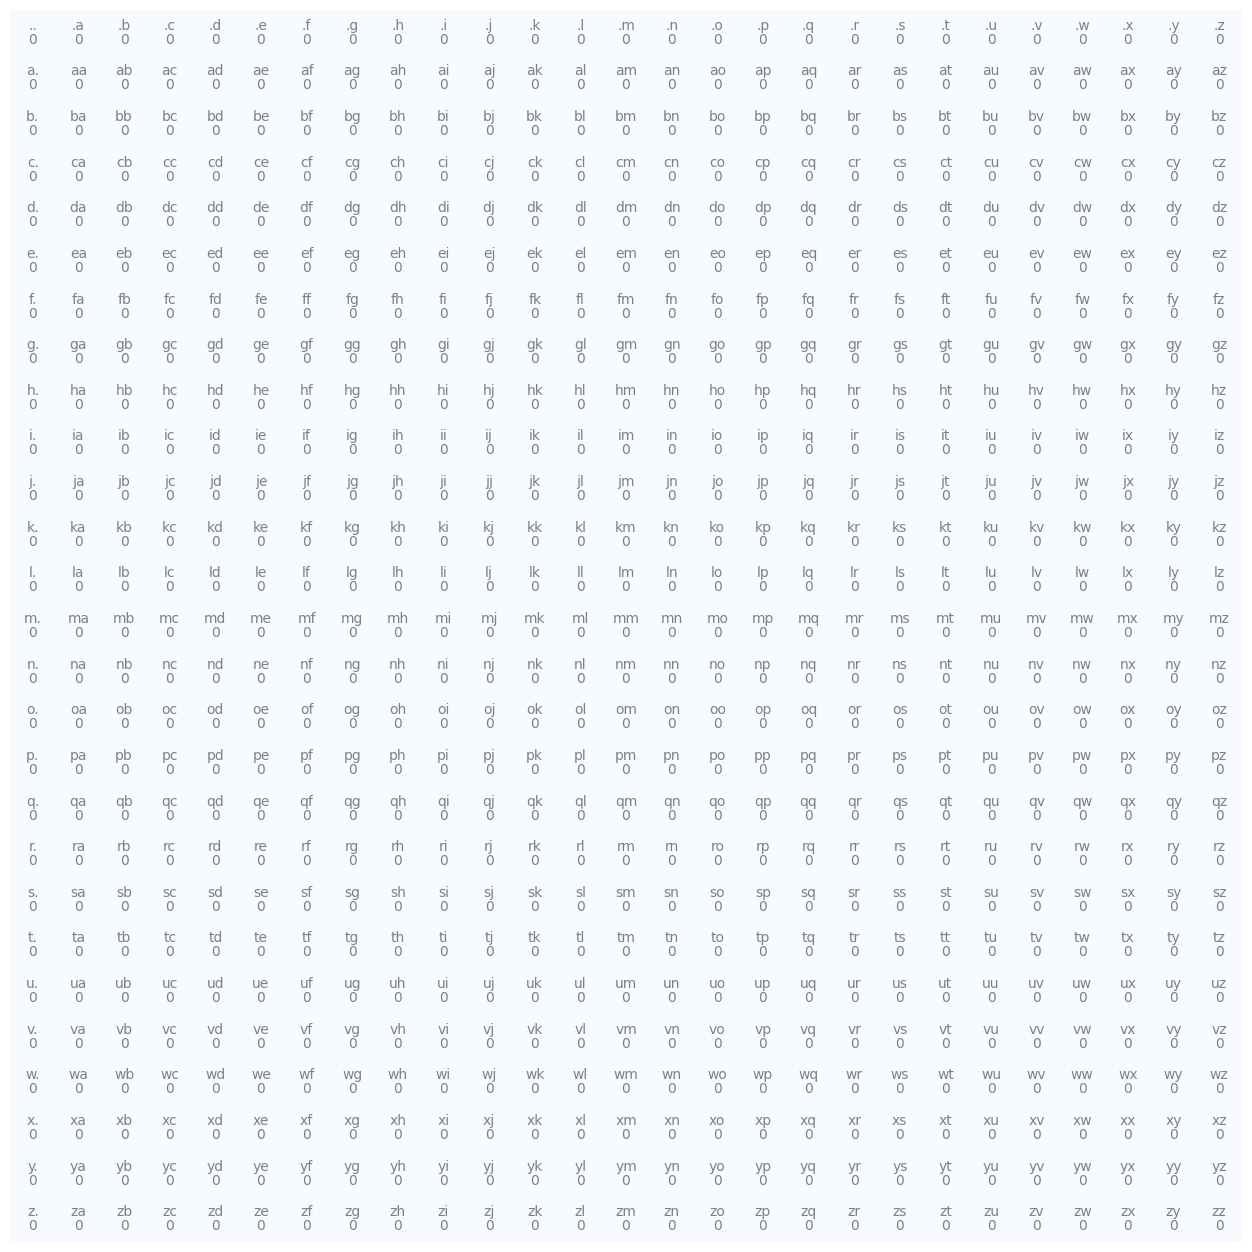

In [75]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_counts, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, bigram_counts[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');
